# ACS 2023 Workshop 
# Example: Sensitivity Analysis 
# Reaction Path Analysis using RenView

## Topics Covered 

- How to run OpenMKM built-in sensitivity analysis using FIM and LSA. 

## References

- [OpenMKM: An Open-Source C++ Multiscale Modeling Simulator for Homogeneous and Heterogeneous Catalytic Reactions; Medasani, Kasiraju, et al; JCIM, 2023](https://pubs.acs.org/doi/10.1021/acs.jcim.3c00088)
- [Microkinetic modeling of surface catalysis; Wittreich, et al; Handbook of Materials Modeling: Applications, 2020](https://scholar.google.com/scholar?oi=bibs&cluster=2412312200916247815&btnI=1&hl=en)



In [1]:
import os
def print_file(fname, begin=None, end=None):
    with open(fname) as fp:
        lines = fp.read()
        if begin is not None and end is not None:
            print(lines[begin:end])
        else:
            print(lines)

basedir = os.getcwd()

## 1. MKM used Ethane Dehydrogenation on Pt

The reaction mechanism contains 23 species (gas and surface) and 29 elementary reactions as shown below

In [2]:
print_file("misc/reactions.out")

Reaction ID
01. CH3CH3 + 2 * <--> CH2CH3* + H*
02. CH2CH2 + * <--> CH2CH2*
03. CHCH + * <--> CHCH*
04. CH4 + * <--> CH4*
05. H2 + 2 * <--> 2 H*
06. CC* + * <--> 2 C*
07. CCH* + * <--> C* + CH*
08. CCH* + * <--> CC* + H*
09. CCH2* + * <--> C* + CH2*
10. CCH2* + * <--> CCH* + H*
11. CCH3* + * <--> C* + CH3*
12. CCH3* + * <--> CCH2* + H*
13. CH* + * <--> C* + H*
14. CH2* + * <--> CH* + H*
15. CH2CH2* + * <--> 2 CH2*
16. CH2CH2* + * <--> CHCH2* + H*
17. CH2CH3* + * <--> CH2* + CH3*
18. CH2CH3* + * <--> CH2CH2* + H*
19. CH2CH3* + * <--> CHCH3* + H*
20. CH4* + * <--> CH3* + H*
21. CH3* + * <--> CH2* + H*
22. CHCH* + * <--> CCH* + H*
23. CHCH* + * <--> 2 CH*
24. CHCH2* + * <--> CCH2* + H*
25. CHCH2* + * <--> CH* + CH2*
26. CHCH2* + * <--> CHCH* + H*
27. CHCH3* + * <--> CCH3* + H*
28. CHCH3* + * <--> CH* + CH3*
29. CHCH3* + * <--> CHCH2* + H*


## 2. Sensitivity Analysis using FIM

### 2.1 Fischer Information Matrix Diagonals

Input specfications to perform FIM analysis. See below

In [3]:
print_file("FIM/reactor.yaml")

reactor:
    type: "pfr"
    area: "1.0 cm2"
    length: "0.1 cm"
    mode: "isothermal"
    temperature:  873
    pressure:  "1 atm"
    cat_abyv: "200 /cm"

inlet_gas:
    flow_rate: "10 cm3/s"

simulation:
    end_time: 50
    solver:
        atol: 1e-8
        rtol: 1e-8
    transient: no
    sensitivity:
        full: true
    output: csv
                    
phases:
    gas:
        name: gas
        initial_state: "CH3CH3:0.07,N2:0.93"
    bulk: 
        name: bulk
    surfaces:
        - name: terrace
          initial_state: "PT(S):1"



### 2.2 Run OpenMKM

In [4]:
!docker run --rm -it --mount type=bind,source="$(pwd)/FIM",target=/data --workdir="/data" vlachosgroup/openmkm /bin/bash -c "omkm reactor.yaml thermo.xml"

-----------------------------------------------------------
OpenMKM: version 0.6.1
-----------------------------------------------------------

OpenMKM is a multiphysics, multiscale, and open source software 
aimed at modelng chemical kinetics. It can run pure gas phase 
as well as surface mechanisms for heterogeneous catalysis.
OpenMKM is developed at Delaware Energy Institute, University
of Delaware. The development of OpenMKM is funded by RAPID.


Kinetics type Gas
Kinetics type Surf
Total # of phases: 3
Surface phase defined? true
Total # of species: 23
Total # of  gas phase species: 6
Total # of surface species: 16
Total # of reactions: 29
Reactor Model: Plug Flow Reactor (PFR)
Catalyst loading (Area/Volume): 20000
Surface Site Density 2.485e-08

Using Sundials? 51
Using LAPACK?   false
Energy enabled? false
External heat supplied: 0
'mode' keyword deprecated. Use 'temperature_mode' instead
Reactor temperature mode: isothermal
Constraints Enabled: true
Energy enabled? false
Simula

In [5]:
print_file("FIM/1d_pfr_sensitivity.dat")

Rxnid	FIM_Diag
0001	7.941613e-08
0002	-7.279988e-08
0003	-5.609930e-09
0004	-2.016361e-09
0005	-8.301004e-08
0006	-1.730002e-13
0007	2.299645e-11
0008	-7.013013e-14
0009	6.144921e-10
0010	2.463794e-11
0011	6.983493e-10
0012	2.273429e-09
0013	-1.337902e-09
0014	-6.832001e-10
0015	3.681030e-15
0016	3.639314e-09
0017	5.420908e-13
0018	7.643751e-08
0019	2.978081e-09
0020	-2.016298e-09
0021	-1.312626e-09
0022	-4.424154e-14
0023	-3.561124e-10
0024	-1.635015e-09
0025	2.135461e-11
0026	5.253774e-09
0027	2.971811e-09
0028	4.781496e-12
0029	9.513961e-13



## 3. Sensitivity Analysis using targeted LSA

LSA can calculate sensitivity of any quantity of interest with respect to
- reaction rate coefficient
- concentration or coverage 

### 3.1 Select Reactions in the input file

In [6]:
print_file("LSA/reactor.yaml")

reactor:
    type: "pfr"
    area: "1.0 cm2"
    length: "0.1 cm"
    mode: "isothermal"
    temperature:  873
    pressure:  "1 atm"
    cat_abyv: "200 /cm"

inlet_gas:
    flow_rate: "10 cm3/s"

simulation:
    end_time: 50
    solver:
        atol: 1e-8
        rtol: 1e-8
    transient: no
    sensitivity:
        reactions:
            - 0001
            - 0002
            - 0003
            - 0004
            - 0005
            - 0006
            - 0007
            - 0008
            - 0009
            - 0010
            - 0011
            - 0012
            - 0013
            - 0014
            - 0015
            - 0016
            - 0017
            - 0018
            - 0019
            - 0020
            - 0021
            - 0022
            - 0023
            - 0024
            - 0025
            - 0026
            - 0027
            - 0028
            - 0029
        species: [] #["CH4", "CHCH"]
            
phases:
    gas:
        name: gas
        initial_state: "CH3CH3:0.0

### 3.2 Run OpenMKM

In [7]:
!docker run --rm -it --mount type=bind,source="$(pwd)/LSA",target=/data --workdir="/data" vlachosgroup/openmkm /bin/bash -c "omkm reactor.yaml thermo.xml"

-----------------------------------------------------------
OpenMKM: version 0.6.1
-----------------------------------------------------------

OpenMKM is a multiphysics, multiscale, and open source software 
aimed at modelng chemical kinetics. It can run pure gas phase 
as well as surface mechanisms for heterogeneous catalysis.
OpenMKM is developed at Delaware Energy Institute, University
of Delaware. The development of OpenMKM is funded by RAPID.


Kinetics type Gas
Kinetics type Surf
Total # of phases: 3
Surface phase defined? true
Total # of species: 23
Total # of  gas phase species: 6
Total # of surface species: 16
Total # of reactions: 29
Reactor Model: Plug Flow Reactor (PFR)
Catalyst loading (Area/Volume): 20000
Surface Site Density 2.485e-08

Using Sundials? 51
Using LAPACK?   false
Energy enabled? false
External heat supplied: 0
'mode' keyword deprecated. Use 'temperature_mode' instead
Reactor temperature mode: isothermal
Constraints Enabled: true
rxn id 0001 added to sensiti

## 4. Plot the Results

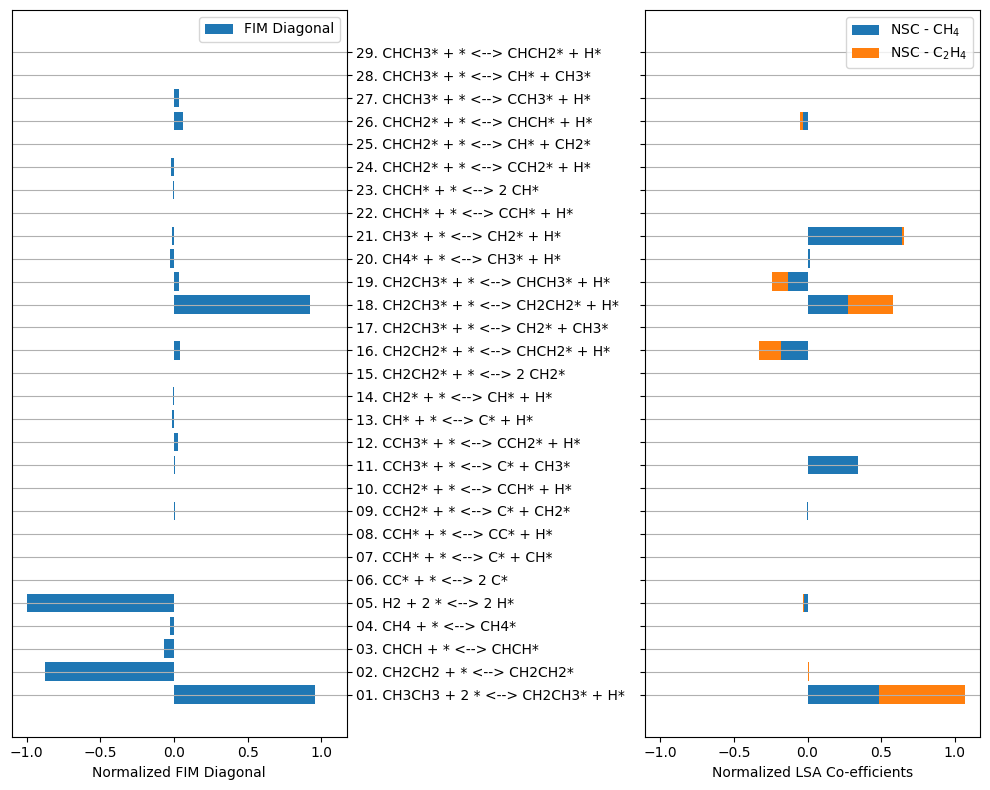

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data_FIM = pd.read_csv('FIM/1d_pfr_sensitivity.dat',
                       sep='\t',
                       )
data_NSC = pd.read_csv('LSA/1d_pfr_sensitivity.dat',
                       sep='\t',
                       usecols=['CH2CH2', 'CH4'],
                      )
data_FIM.pop('Rxnid')
data_FIM['FIM-Diag.'] = data_FIM['FIM_Diag']/np.abs(data_FIM['FIM_Diag']).max()
data_reac = pd.read_csv('misc/reactions.out',
                        usecols=['Reaction ID'])
react_names = data_reac['Reaction ID'].values.T


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,8), sharex=True)
ax1.barh(range(len(data_FIM)), data_FIM['FIM-Diag.'].values.T, label='FIM Diagonal')
ax1.set_xlabel('Normalized FIM Diagonal')

ax2.barh(np.arange(len(data_NSC)), data_NSC['CH4'].values.T,
         label='NSC - CH$_4$')
ax2.barh(np.arange(len(data_NSC)),
         data_NSC['CH2CH2'].values.T,
         left=list(data_NSC['CH4'].values.T),
         label='NSC - C$_2$H$_4$')
ax2.set_xlabel('Normalized LSA Co-efficients')

ax1.yaxis.tick_right()
ax1.set_yticks(np.arange(0,len(data_FIM)))
ax1.set_yticklabels(react_names)
ax2.set_yticks(np.arange(0,len(data_NSC)))
plt.setp(ax2.get_yticklabels(), visible=False)

ax1.legend(loc='best')
ax2.legend(loc='best')

ax1.grid(axis='y', zorder=0)
ax2.grid(axis='y', zorder=0)
fig.subplots_adjust(wspace=2.0, hspace=0)
plt.tight_layout()

## 5. Generate RPA using ReNView 

### 5.1 Details about ReNView  

#### References

- [OpenMKM: An Open-Source C++ Multiscale Modeling Simulator for Homogeneous and Heterogeneous Catalytic Reactions; Medasani, Kasiraju, et al; JCIM, 2023](https://pubs.acs.org/doi/10.1021/acs.jcim.3c00088)
- [Reaction Network Viewer (ReNView): An open-source framework for reaction path visualization of chemical reaction systems; Gupta, Udit, et al; SoftwareX, 2020](https://www.softxjournal.com/article/S2352-7110(19)30243-2/fulltext)

ReNView can be installed using 

`pip install renview`

RenView depends on the GraphViz library to generate the final .svg files. 



In [9]:
from renview import GraphGenerator as gg

species_populations = []

def run(species_file, reactions_file, initial_reactant, reaction_cutoffrate,
        elements_desired, normalization, output_directory):
    gg.input_species_file(species_file)
    gg.input_reactions_file(reactions_file)
    gg.input_initial_reactant(initial_reactant)
    gg.input_reaction_cutoffrate(reaction_cutoffrate)
    gg.input_elements_desired(elements_desired)
    gg.input_normalization(normalization)
    gg.input_output_directory(output_directory)
    gg.generate_visualizations()
    species_populations = gg.get_species_populations()
    gg.erase_data()

# Maximum Reaction rate
norm = 1
default_kwargs = {
        'species_file': 'LSA/species.out',
        'reactions_file':'LSA/rates_ss.out',
        'initial_reactant': 'CH3CH3',
        'reaction_cutoffrate': 1.0E-10,
        'elements_desired': ['C', 'H'],
        'normalization': norm,  
        'output_directory': r'./RPA/',
    }
run(**default_kwargs)

In [10]:
import subprocess
subprocess.run(['dot', '-Tsvg', './RPA/Normalization_MaxReactionRate.txt', '-o', './RPA/Normalization_MaxReactionRate.svg'])

CompletedProcess(args=['dot', '-Tsvg', './RPA/Normalization_MaxReactionRate.txt', '-o', './RPA/Normalization_MaxReactionRate.svg'], returncode=0)